<a href="https://colab.research.google.com/github/maggieliuzzi/reinforcement_learning/blob/master/explore_exploit_dilemma/UCB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Upper Confidence Bound**

In [0]:
from __future__ import print_function, division  # sudo pip install -U future
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

In [0]:
NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [0]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [0]:
def ucb(mean, n, nj):
  return mean + np.sqrt(2 * np.log(n) / nj)  # 2 is a hyperparameter, can explore for various amounts of exploration

In [0]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
rewards = np.empty(NUM_TRIALS)
total_plays = 0

In [0]:
# initialization: play each bandit once
for j in range(len(bandits)):
  x = bandits[j].pull()
  total_plays += 1
  bandits[j].update(x)

for i in range(NUM_TRIALS):
  j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
  x = bandits[j].pull()
  total_plays += 1
  bandits[j].update(x)

  # for the plot
  rewards[i] = x

In [0]:
for b in bandits:
  print(b.p_estimate)  # pretty accurate, probably because the suboptimal bandits were played more than needed
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num times selected each bandit:", [b.N for b in bandits])

0.21052631578947367
0.5135869565217395
0.7497765144286329
total reward earned: 74852.0
overall win rate: 0.74852
num times selected each bandit: [76.0, 368.0, 99559.0]


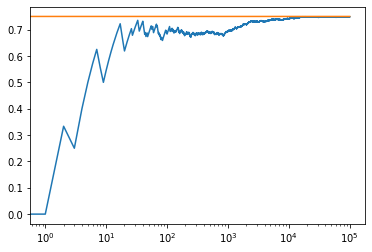

In [0]:
cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

# plot moving average ctr
plt.plot(cumulative_average)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.xscale('log')
plt.show()

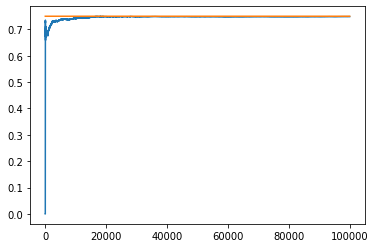

In [0]:
# plot moving average ctr linear
plt.plot(cumulative_average)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.show()